# Warangal Heatwave Prediction: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler

2023-03-03 23:21:28.815856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 23:21:29.473167: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 23:21:29.473248: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 23:21:29.473256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

## Loading Datasets and Preprocessing: 

In [2]:
db19 = pd.read_csv("./Datasets/2019")
db20 = pd.read_csv("./Datasets/2020")
db21 = pd.read_csv("./Datasets/2021.csv")
db22 = pd.read_csv("./Datasets/2022.csv")
db_soil = pd.read_csv("./Datasets/soil.csv")

In [3]:
db19.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [4]:
db20.District.unique()

array(['Adilabad', 'Nizamabad', 'Karimnagar', 'Khammam'], dtype=object)

In [5]:
db20.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2020-01-01,6.8,16.4,25.8,62.2,96.2,3.2,0.0
1,1,Adilabad,Bheempoor,2020-01-02,0.0,17.1,27.7,65.4,94.8,2.1,0.0
2,2,Adilabad,Bheempoor,2020-01-03,25.8,16.9,22.2,85.6,96.9,1.1,0.0
3,3,Adilabad,Bheempoor,2020-01-04,0.0,15.1,23.0,79.5,98.3,1.4,0.0
4,4,Adilabad,Bheempoor,2020-01-05,0.0,13.2,25.7,63.5,98.2,0.7,0.0


In [6]:
db21.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01 00:00:00,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02 00:00:00,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03 00:00:00,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04 00:00:00,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05 00:00:00,0.0,13.4,29.8,50.7,97.0,2.0,0.0


In [7]:
db21_1 = db21.iloc[:53010]
db21_2 = db21.iloc[53010:]

db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")
db21 = pd.concat((db21_1,db21_2))
db21

/tmp/ipykernel_15789/56031398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
/tmp/ipykernel_15789/56031398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")


,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05,0.0,13.4,29.8,50.7,97.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225522,225522,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-27,0.0,18.5,31.0,45.1,93.5,4.0,0.0
225523,225523,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-28,0.0,17.1,29.0,46.5,91.8,5.6,0.0
225524,225524,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-29,0.0,16.5,29.8,45.2,92.3,8.1,0.0
225525,225525,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-30,0.0,17.5,30.0,43.9,90.8,8.2,0.0


In [8]:
db22.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5


In [9]:
db22.Date = pd.to_datetime(db22.Date,format="%d-%b-%y")

In [10]:
db22

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,2022-01-01,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,2022-01-02,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,2022-01-03,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,2022-01-04,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,2022-01-05,0.0,12.5,28.5,41.9,97.7,0.0,9.5
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,0.0,2.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,0.0,1.2
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,0.0,8.7
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,0.0,6.5


In [11]:
db = pd.concat((db19,db20,db21,db22))
# db = pd.concat((db19,db20))
db.drop("Unnamed: 0",axis=1,inplace=True)
db.Date = pd.to_datetime(db.Date,format = "%Y-%m-%d")

In [12]:
db

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,2.0,0.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,1.2,0.0
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,8.7,0.0
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,6.5,0.0


In [13]:
db.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [14]:
db.District.unique()

array(['Adilabad', 'Bhadradri-Kothagudem', 'Hyderabad', 'Jagtial',
       'Jangaon', 'Jayashankar-Bhupalpally', 'Jogulamba-Gadwal',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Kumuram Bheem - Asifabad',
       'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak',
       'Medchal-Malkajgiri', 'Nagarkurnool', 'Nalgonda', 'Nirmal',
       'Nizamabad', 'Peddapalli', 'Rajanna-Siricilla', 'Rangareddy',
       'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy',
       'Warangal (R)', 'Warangal (U)', 'Yadadri-Bhongir', 'Mulug',
       'Narayanpet', 'Komaram Bheem-Asifabad', 'Warangal Rural',
       'Warangal Urban', 'Kumuram Bheem', 'Jayashankar',
       'Bhadradri Kothagudem', 'Rajanna Sircilla', 'Yadadri Bhuvanagiri',
       'Jogulamba Gadwal', 'Mulugu', 'Hanumakkonda', 'Warangal',
       'Hanumakonda'], dtype=object)

In [15]:
war = db[db.District.isin(["Warangal",'Warangal (R)',"Warangal (U)",'Warangal Urban','Warangal Rural'])]
war

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
80370,Warangal (R),Atmakur,2019-01-01,0.0,7.3,27.0,26.4,100.0,0.0,16.4
80371,Warangal (R),Atmakur,2019-01-02,0.0,7.0,29.3,21.3,100.0,0.0,16.4
80372,Warangal (R),Atmakur,2019-01-03,0.0,9.2,30.7,29.9,100.0,0.0,13.1
80373,Warangal (R),Atmakur,2019-01-04,0.0,10.0,31.0,33.1,100.0,0.0,20.6
80374,Warangal (R),Atmakur,2019-01-05,0.0,11.9,31.1,33.1,100.0,0.0,12.7
...,...,...,...,...,...,...,...,...,...,...
161647,Warangal,Wardhannapet,2022-09-26,0.0,23.6,34.5,72.1,100.0,4.1,0.0
161648,Warangal,Wardhannapet,2022-09-27,0.0,23.8,34.0,75.4,100.0,6.2,0.1
161649,Warangal,Wardhannapet,2022-09-28,0.0,24.2,32.9,80.1,100.0,4.6,0.0
161650,Warangal,Wardhannapet,2022-09-29,0.0,23.9,33.9,61.9,100.0,7.2,0.0


In [16]:
war.Mandal.unique()

array(['Atmakur', 'Chennaraopeta', 'Damera', 'Duggondi', 'Geesugonda',
       'Khanapur', 'Nallabelly', 'Narsampet', 'Nekkonda', 'Parkal',
       'Parvathagiri', 'Raiparthy', 'Sangem', 'Shayampet', 'Wardhannapet',
       'Bheemadevarapalle', 'Dharmasagar', 'Elkathurthi', 'Hanamkonda',
       'Hasanparthy', 'Inole', 'Kamalapur', 'Khazipet', 'Khilla Warangal',
       'Velair', 'Warangal', 'Nadikuda', 'Khilla_Warangal'], dtype=object)

In [17]:
war.Mandal = war.Mandal.transform(lambda x : x.strip())

/tmp/ipykernel_15789/250351059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war.Mandal = war.Mandal.transform(lambda x : x.strip())


In [18]:
war.Mandal.unique()

array(['Atmakur', 'Chennaraopeta', 'Damera', 'Duggondi', 'Geesugonda',
       'Khanapur', 'Nallabelly', 'Narsampet', 'Nekkonda', 'Parkal',
       'Parvathagiri', 'Raiparthy', 'Sangem', 'Shayampet', 'Wardhannapet',
       'Bheemadevarapalle', 'Dharmasagar', 'Elkathurthi', 'Hanamkonda',
       'Hasanparthy', 'Inole', 'Kamalapur', 'Khazipet', 'Khilla Warangal',
       'Velair', 'Warangal', 'Nadikuda', 'Khilla_Warangal'], dtype=object)

In [19]:
war.Mandal = war.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x)) 

/tmp/ipykernel_15789/2273391410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war.Mandal = war.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x))


In [20]:
war.Mandal.unique()

array(['Atmakur', 'Chennaraopeta', 'Damera', 'Duggondi', 'Geesugonda',
       'Khanapur', 'Nallabelly', 'Narsampet', 'Nekkonda', 'Parkal',
       'Parvathagiri', 'Raiparthy', 'Sangem', 'Shayampet', 'Wardhannapet',
       'Bheemadevarapalle', 'Dharmasagar', 'Elkathurthi', 'Hanamkonda',
       'Hasanparthy', 'Inole', 'Kamalapur', 'Khazipet', 'Khilla Warangal',
       'Velair', 'Warangal', 'Nadikuda', 'Khilla_Warangal'], dtype=object)

In [21]:
len(war.Date.unique())

1002

In [22]:
war = war.groupby("Date").mean().sort_index()
war["Date"] = war.index
war.index = np.arange(len(war))
war

/tmp/ipykernel_15789/1714530464.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  war = war.groupby("Date").mean().sort_index()


,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Date
0,0.000000,9.810811,28.424324,24.397297,85.913514,0.000000,5.961111,2019-01-01
1,0.000000,10.159459,30.210811,19.837838,87.521622,0.000000,7.138889,2019-01-02
2,0.000000,12.308108,31.270270,26.232432,91.067568,0.000000,5.894444,2019-01-03
3,0.000000,12.464865,31.524324,31.132432,93.567568,0.000000,6.563889,2019-01-04
4,0.000000,15.702703,31.275676,34.045946,94.059459,0.000000,6.858333,2019-01-05
...,...,...,...,...,...,...,...,...
997,0.000000,23.738462,34.030769,56.815385,99.461538,5.930769,0.000000,2022-09-26
998,11.300000,23.107692,33.476923,64.384615,99.761538,10.107692,0.030769,2022-09-27
999,0.000000,24.200000,32.500000,68.223077,100.000000,7.915385,0.000000,2022-09-28
1000,6.661538,23.730769,33.730769,64.323077,99.976923,6.600000,0.000000,2022-09-29


/tmp/ipykernel_15789/1361307709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(war.corr(),annot=True)


<AxesSubplot: >

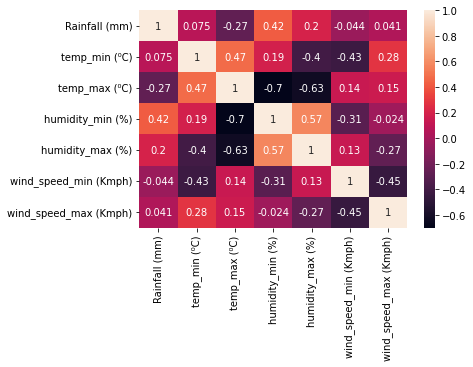

In [23]:
# plt.figure(figsize=(15,15))
sns.heatmap(war.corr(),annot=True)

In [24]:
war.drop(["wind_speed_min (Kmph)","wind_speed_max (Kmph)"],axis=1,inplace=True)
war.fillna(method="ffill",inplace=True)

In [25]:
war

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Date
0,0.000000,9.810811,28.424324,24.397297,85.913514,2019-01-01
1,0.000000,10.159459,30.210811,19.837838,87.521622,2019-01-02
2,0.000000,12.308108,31.270270,26.232432,91.067568,2019-01-03
3,0.000000,12.464865,31.524324,31.132432,93.567568,2019-01-04
4,0.000000,15.702703,31.275676,34.045946,94.059459,2019-01-05
...,...,...,...,...,...,...
997,0.000000,23.738462,34.030769,56.815385,99.461538,2022-09-26
998,11.300000,23.107692,33.476923,64.384615,99.761538,2022-09-27
999,0.000000,24.200000,32.500000,68.223077,100.000000,2022-09-28
1000,6.661538,23.730769,33.730769,64.323077,99.976923,2022-09-29


### Scaling the Data: 

In [26]:
n = StandardScaler()
n1 = StandardScaler()
dates = war.Date
cols = war.columns
ind = war.index

for i in war:
    if i!="temp_max (⁰C)" and i!="Date":
        war[i] = n.fit_transform(war[i].values.reshape(-1,1))
    elif i!="Date":
        n1.fit(war[i].values.reshape(-1,1))
        war[i]=n1.transform(war[i].values.reshape(-1,1))
        
war["Day"] = war.Date.dt.day
war["Month"] = war.Date.dt.month
war["Year"] = war.Date.dt.year
war.drop("Date",axis=1,inplace=True)
war

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Day,Month,Year
0,-0.349960,-3.009891,-1.501985,-1.200882,-0.465424,1,1,2019
1,-0.349960,-2.927477,-1.034451,-1.423184,-0.329391,2,1,2019
2,-0.349960,-2.419577,-0.757184,-1.111407,-0.029432,3,1,2019
3,-0.349960,-2.382523,-0.690696,-0.872500,0.182048,4,1,2019
4,-0.349960,-1.617160,-0.755769,-0.730448,0.223658,5,1,2019
...,...,...,...,...,...,...,...,...
997,-0.349960,0.282340,-0.034745,0.379709,0.680631,26,9,2022
998,0.672309,0.133238,-0.179689,0.748758,0.706009,27,9,2022
999,-0.349960,0.391439,-0.435356,0.935907,0.726181,28,9,2022
1000,0.252685,0.280522,-0.113256,0.745757,0.724229,29,9,2022


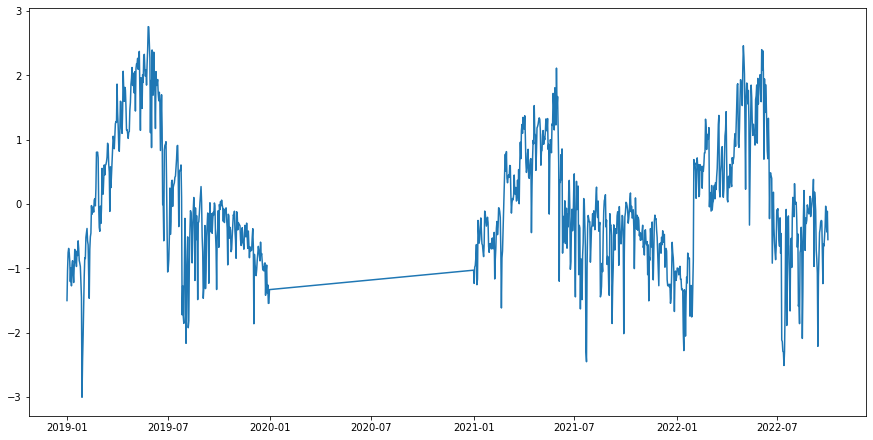

In [27]:
plt.figure(figsize=(15,7.5))
plt.plot(dates,war["temp_max (⁰C)"])

## Seasonal Decompose: 

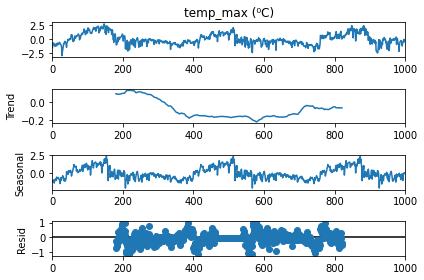

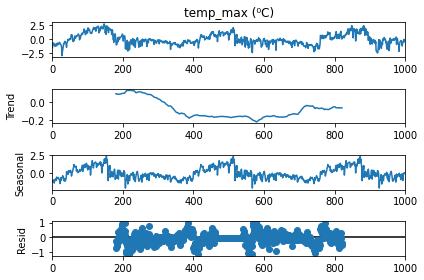

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


r = seasonal_decompose(war["temp_max (⁰C)"],model='additive',period=360)
r.plot()

In [29]:
len(war)

1002

<AxesSubplot: >

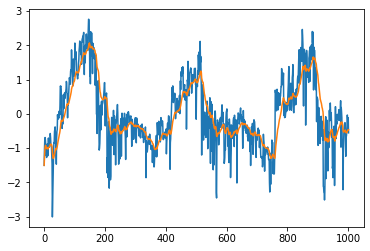

In [30]:
war["temp_max (⁰C)"].plot()
war["temp_max (⁰C)"].ewm(span=30).mean().plot()

# war["temp_max (⁰C)"] = war["temp_max (⁰C)"].ewm(span=30).mean()

## Time Series Forecasting: 

In [31]:
def series_gen(db,label,window=360,lead=360):
    X = db.values
    y = db[label].values

    X_,y_ = [],[]

    for i in range(len(db)-window-lead):
        row = [r for r in X[i:i+window]]
        X_.append(row)
        y_.append(y[i+window:i+window+lead])

    return np.array(X_),np.array(y_)

In [32]:
X,y = series_gen(war,"temp_max (⁰C)")

In [33]:
X.shape,y.shape

((282, 360, 8), (282, 360))

In [34]:
y

array([[-1.25827597, -1.54566793, -1.54324473, ..., -1.2466446 ,
        -1.54458681, -1.46808813],
       [-1.54566793, -1.54324473, -1.33145673, ..., -1.54458681,
        -1.46808813, -1.10975223],
       [-1.54324473, -1.33145673, -1.02952555, ..., -1.46808813,
        -1.10975223, -0.59640585],
       ...,
       [ 0.01357043, -0.0327314 , -0.10319071, ..., -0.35281796,
        -0.03474452, -0.17968938],
       [-0.0327314 , -0.10319071, -0.29846364, ..., -0.03474452,
        -0.17968938, -0.43535601],
       [-0.10319071, -0.29846364, -0.22196497, ..., -0.17968938,
        -0.43535601, -0.11325632]])

In [35]:
testx,testy = X[-100:],y[-100:]

lead = 360

trainx,trainy = X[:-100-50],y[:-100-50]
valx,valy = X[-100-50:-100],y[-100-50:-100]

In [36]:
trainx.shape

(132, 360, 8)

### LSTM Model 

In [38]:
model = Sequential()
model.add(InputLayer((X.shape[1],X.shape[2])))
model.add(LSTM(128))
model.add(Dense(64,activation="relu"))
# model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(y.shape[1]))

model.compile(loss=MeanSquaredError(),metrics=RootMeanSquaredError(),optimizer=Adam(learning_rate=0.0001))

model.summary()

model.fit(trainx,trainy,validation_data=(valx,valy),epochs=1000)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 360)               23400     
                                                                 
Total params: 105,960
Trainable params: 105,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 [==============================] - 2s 94ms/step - loss: 0.7366 - root_mean_squared_error: 0.8583 - val_loss: 0.9068 - val_root_mean_squared_error: 0.9523
Epoch 2/1

In [37]:
model = tf.keras.models.load_model("./Models/Warangal")

2023-03-03 23:21:34.522561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:21:34.539716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:21:34.539996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:21:34.540548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [38]:
pred = model.predict(testx)

2023-03-03 23:21:37.296234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800


4/4 [==============================] - 2s 5ms/step


2023-03-03 23:21:37.928631: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [39]:
pred.shape

(100, 360)

In [40]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(testy,pred)

3.5774478239753402

In [41]:
pred_plot = n1.inverse_transform(pred[:,0].reshape(-1,1)).T[0]
test_plot = n1.inverse_transform(testy[:,0].reshape(-1,1)).T[0]

### Test Forecast: 

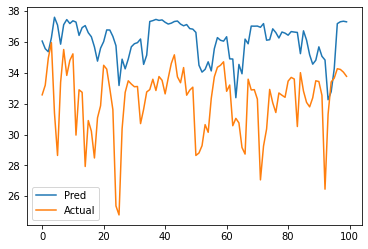

In [42]:
plt.plot(pred_plot)
plt.plot(test_plot)
plt.legend(["Pred","Actual"])
# plt.vlines(dates.iloc[-200],-2,2,'r')

9/9 [==============================] - 0s 5ms/step


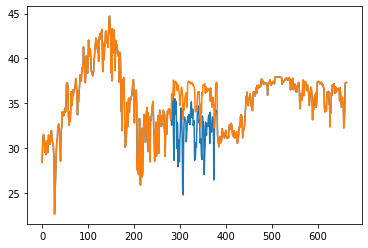

In [43]:
plt.plot(np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],test_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))
plt.plot(np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],pred_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))

In [44]:
model.save("./Models/Warangal")

INFO:tensorflow:Assets written to: ./Models/Warangal/assets


INFO:tensorflow:Assets written to: ./Models/Warangal/assets


In [45]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(testy,pred)
rmfse = np.sqrt(mean_squared_error(pred,testy))
rmfse

1.2923488378514212

In [46]:
X[-1].shape

(360, 8)

In [47]:
pred = model.predict(X[-1:])
pred_plot = n1.inverse_transform(pred[0,:].reshape(-1,1)).T[0]
test_plot = n1.inverse_transform(y[-1,:].reshape(-1,1)).T[0]

1/1 [==============================] - 0s 20ms/step


### Plotting with Prediction Interval: 

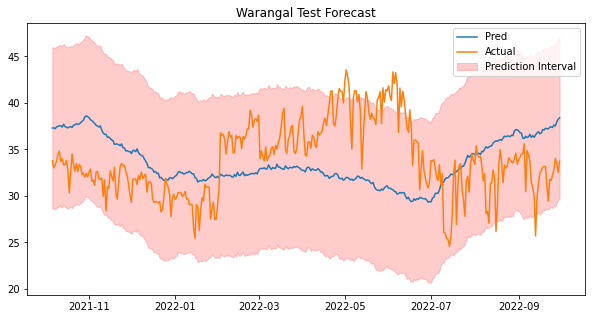

In [48]:
from scipy.stats import t

a = 0.1

n = len(pred_plot)

t_ = t.ppf(1-a/2, df=len(pred_plot)-2)

x = np.arange(len(pred_plot))
x_ = np.mean(x)

interval = t_ * np.sqrt((np.square(pred_plot-test_plot).sum()/(n-2)) * (1+(1/n)+(np.square(x-x_)/np.square(x-x_).sum())))

plt.figure(figsize=(10,5))
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.fill_between(dates[-360:],pred_plot+interval,pred_plot-interval,color='red',alpha=0.2)

plt.title("Warangal Test Forecast")
plt.legend(["Pred","Actual","Prediction Interval"])

In [49]:
from sklearn.metrics import mean_absolute_percentage_error

print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(pred_plot,test_plot)*100,3)}')

Mean Absolute Percentage Error: 13.447


## Predicting Heatwaves using Temperature Forecast

In [50]:
db_ = db[db.District=="Warangal"].groupby("Date").mean().resample("W").mean()
db_["Date"] = db_.index

md = db_.Date.dt.strftime("%W")

db_ = db_.groupby(md, sort=False)['temp_max (⁰C)'].mean().reset_index()

/tmp/ipykernel_15789/1348227687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_ = db[db.District=="Warangal"].groupby("Date").mean().resample("W").mean()


In [51]:
ft = model.predict(X[-1:])
ft_plot = n1.inverse_transform(ft.reshape(-1,1)).T[0]-2

1/1 [==============================] - 0s 16ms/step


In [52]:
pred_db = pd.DataFrame()
pred_db["Date"] = pd.date_range("2022-09-30",periods=360)
pred_db["Temp"] = ft_plot
pred_db["WeekNo"] = pred_db.Date.dt.strftime("%W")
pred_db["Upper_Limit"] = pred_db["Temp"].values + interval
pred_db["Lower_Limit"] = pred_db["Temp"].values - interval
pred_db["Deviation"] = [ np.float64(i-db_[db_.Date==str(j)]["temp_max (⁰C)"].values) for i,j in pred_db.loc[:,["Upper_Limit","WeekNo"]].values]
pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]
pred_db[pred_db.HeatWave!=0]

/tmp/ipykernel_15789/136357867.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]


,Date,Temp,WeekNo,Upper_Limit,Lower_Limit,Deviation,HeatWave
0,2022-09-30,35.300175,39,43.961327,26.639023,10.36107,2
1,2022-10-01,35.322182,39,43.982939,26.661424,10.382683,2
2,2022-10-02,35.229443,39,43.889808,26.569077,10.289551,2
3,2022-10-03,35.412605,40,44.072581,26.752630,10.192361,2
4,2022-10-04,35.498085,40,44.157672,26.838498,10.277453,2
...,...,...,...,...,...,...,...
355,2023-09-20,35.629539,38,44.289127,26.969952,12.547369,2
356,2023-09-21,35.529697,38,44.189673,26.869722,12.447914,2
357,2023-09-22,35.945568,38,44.605933,27.285203,12.864175,2
358,2023-09-23,36.252815,38,44.913573,27.592058,13.171814,2


In [53]:
pred_db.to_csv("./Heatwave Predictions/Warangal.csv")